In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25)
fc, pc, tc = data_instance.create_dataset(20, 2, [50], [0.2], True)

In [3]:
import torch
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

/tmp/ipykernel_135235/2979240048.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403246168/work/torch/csrc/utils/tensor_new.cpp:275.)
  fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)


In [4]:
model_diag = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_diag.set_device(device)

In [6]:
model_diag.set_test_data(tc)

In [7]:
model_diag.train_diagonal(num_epochs=100)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:137: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403246168/work/aten/src/ATen/native/TensorShape.cpp:3637.)
  + posterior_mean.T @ torch.linalg.inv(posterior_diag) @ posterior_mean)


Epoch: 0, Loss: 0.503248
Epoch: 1, Loss: 0.496093
Epoch: 2, Loss: 0.519065
Epoch: 3, Loss: 0.496983
Epoch: 4, Loss: 0.495797
Epoch: 5, Loss: 0.498018
Epoch: 6, Loss: 0.483199
Epoch: 7, Loss: 0.500937
Epoch: 8, Loss: 0.498892
Epoch: 9, Loss: 0.502678
Epoch: 10, Loss: 0.507862
Epoch: 11, Loss: 0.494390
Epoch: 12, Loss: 0.500162
Epoch: 13, Loss: 0.496178
Epoch: 14, Loss: 0.493882
Epoch: 15, Loss: 0.485937
Epoch: 16, Loss: 0.483272
Epoch: 17, Loss: 0.485519
Epoch: 18, Loss: 0.477565
Epoch: 19, Loss: 0.479311
Epoch: 20, Loss: 0.471428
Epoch: 21, Loss: 0.483295
Epoch: 22, Loss: 0.473035
Epoch: 23, Loss: 0.472453
Epoch: 24, Loss: 0.470076
Epoch: 25, Loss: 0.481316
Epoch: 26, Loss: 0.482837
Epoch: 27, Loss: 0.486177
Epoch: 28, Loss: 0.482345
Epoch: 29, Loss: 0.475290
Epoch: 30, Loss: 0.484326
Epoch: 31, Loss: 0.481452
Epoch: 32, Loss: 0.468976
Epoch: 33, Loss: 0.475259
Epoch: 34, Loss: 0.471974
Epoch: 35, Loss: 0.473075
Epoch: 36, Loss: 0.469124
Epoch: 37, Loss: 0.478201
Epoch: 38, Loss: 0.481

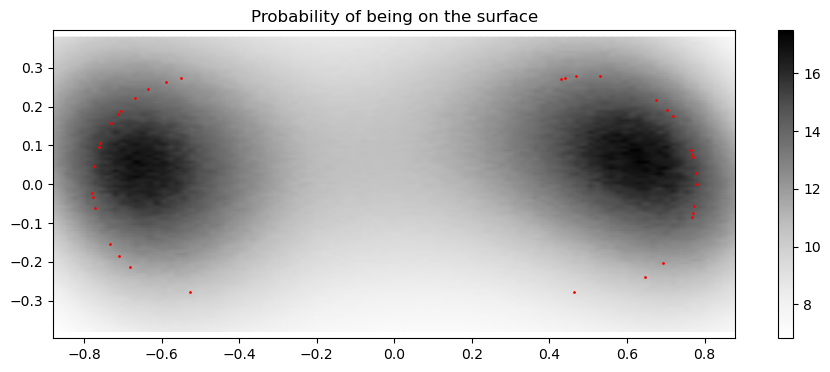

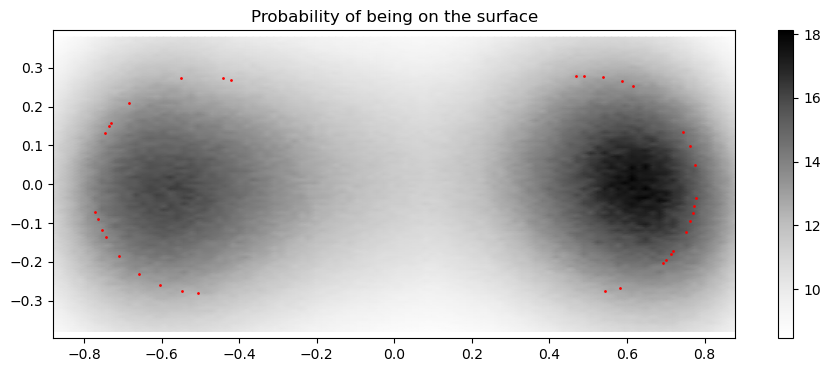

In [8]:
model_diag.predict()

In [9]:
model_diag.set_test_data(pc[:2, :])

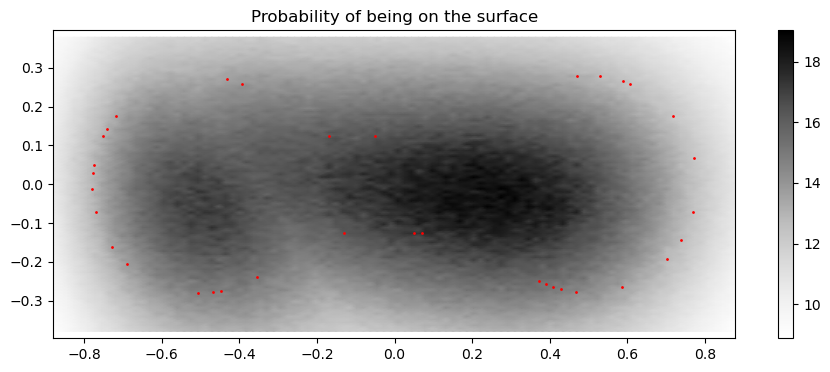

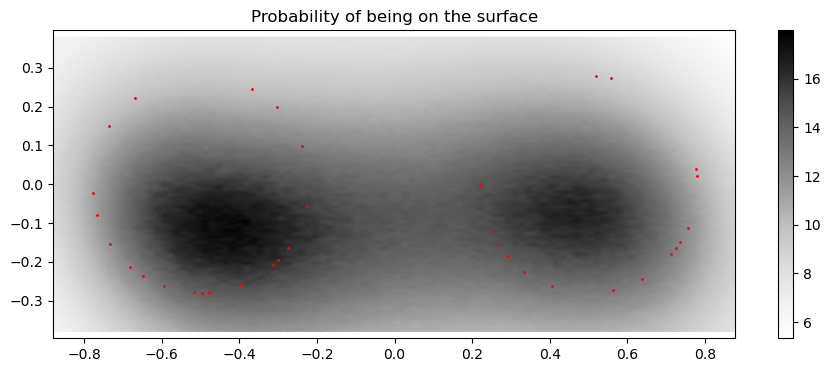

In [10]:
model_diag.predict()

In [11]:
model_chol = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [12]:
model_chol.set_device(device)

In [13]:
model_chol.train_cholesky(num_epochs=100)

Epoch: 0, Loss: -44.960854
Epoch: 1, Loss: -8.565152
Epoch: 2, Loss: 31.121195
Epoch: 3, Loss: -12.267077
Epoch: 4, Loss: 132.823212
Epoch: 5, Loss: 71.419296
Epoch: 6, Loss: -79.856712
Epoch: 7, Loss: 130.969345
Epoch: 8, Loss: 898.284363
Epoch: 9, Loss: 29.601437
Epoch: 10, Loss: 56.552376
Epoch: 11, Loss: -24.183334
Epoch: 12, Loss: 63.971142
Epoch: 13, Loss: -256.725922
Epoch: 14, Loss: 158.325333
Epoch: 15, Loss: -1264.324585
Epoch: 16, Loss: -54.568462
Epoch: 17, Loss: 163.613541
Epoch: 18, Loss: 5.132333
Epoch: 19, Loss: 159.475098
Epoch: 20, Loss: 29.107746
Epoch: 21, Loss: 45.549854
Epoch: 22, Loss: 107.395798
Epoch: 23, Loss: 274.290039
Epoch: 24, Loss: 135.948944
Epoch: 25, Loss: 57.448235
Epoch: 26, Loss: 59.853962
Epoch: 27, Loss: 65.425888
Epoch: 28, Loss: 58.143627
Epoch: 29, Loss: 24.433975
Epoch: 30, Loss: 225.118317
Epoch: 31, Loss: 129.161224
Epoch: 32, Loss: 71.388649
Epoch: 33, Loss: 36.342060
Epoch: 34, Loss: 31.357248
Epoch: 35, Loss: 71.010117
Epoch: 36, Loss: 6

In [14]:
model_chol.set_test_data(tc)

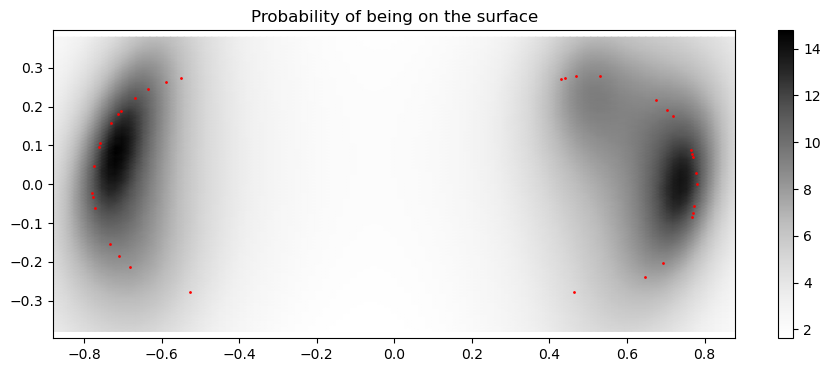

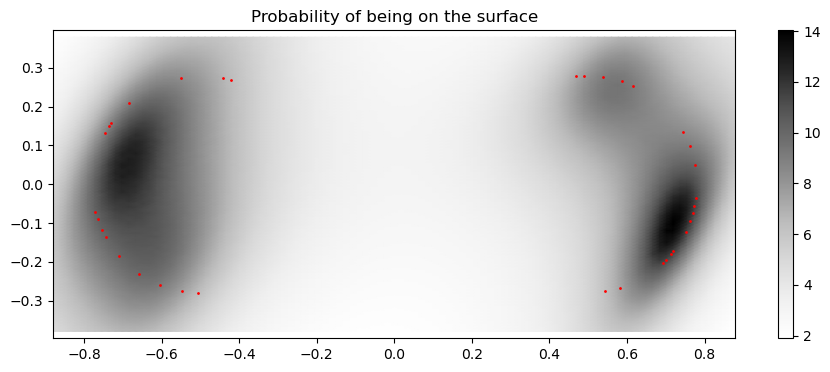

In [15]:
model_chol.predict()

In [16]:
model_chol.set_test_data(pc[:2, :])

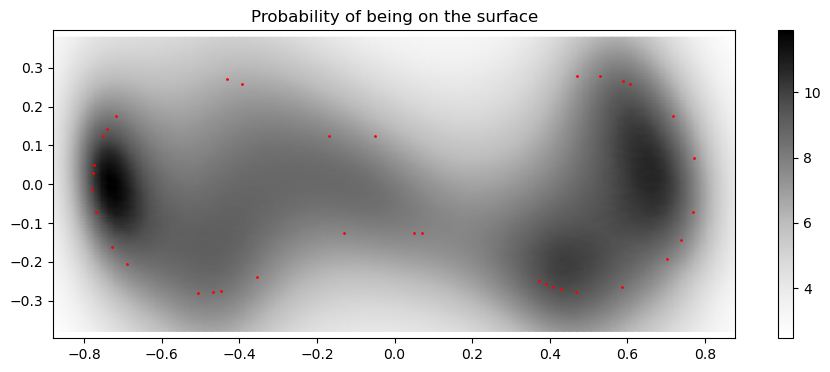

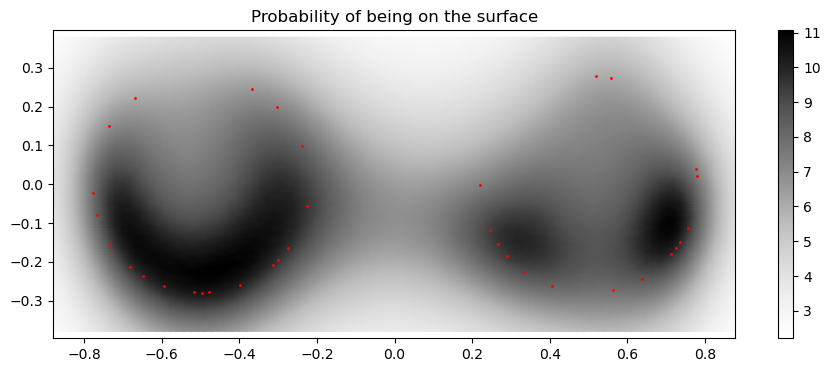

In [17]:
model_chol.predict()